You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

In [13]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
df.shape

(768, 9)

<AxesSubplot: >

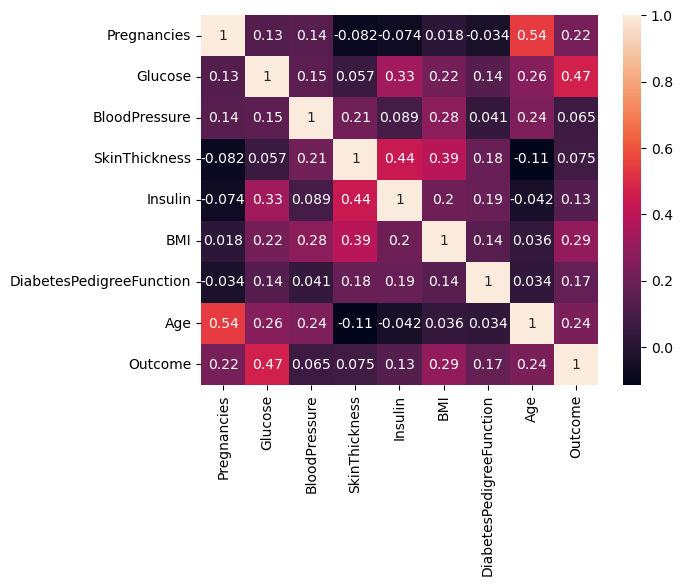

In [18]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: >

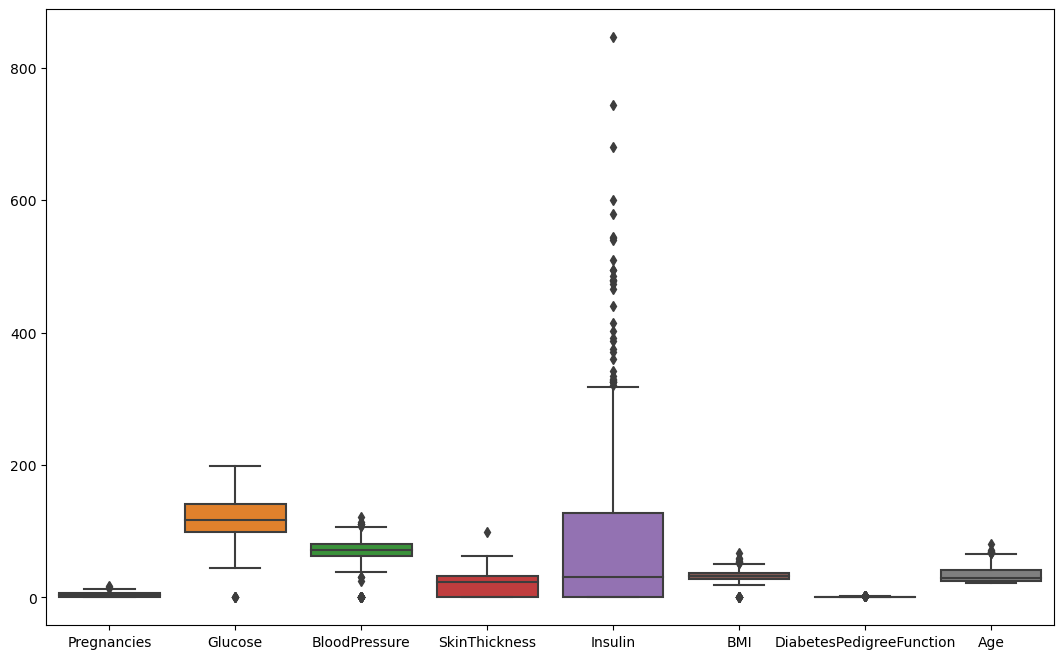

In [38]:
plt.figure(figsize=(13,8))
sns.boxplot(data = df.iloc[:,:-1])

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

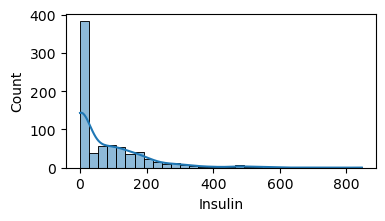

In [19]:
plt.figure(figsize=(4,2))
sns.histplot(x=df['Insulin'],kde=True)

Draw conclusions: Based on the descriptive statistics and visualizations, draw conclusions about the data and its variables. Identify any interesting patterns or relationships, and note any areas that require further investigation.'

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [22]:
#independent features
X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [24]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [25]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_score = cross_val_score(classifier, X, y, cv=5)
print(cv_score)
print(np.mean(cv_score))


[0.67532468 0.65584416 0.68181818 0.81045752 0.70588235]
0.7058653764536118


In [28]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred=classifier.predict(X_test)

In [30]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [31]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
print(score)

-0.24973404255319132


In [32]:
## Hyperparameter Tunning
parameter={
 'criterion':['gini', 'entropy', 'log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
classifier=DecisionTreeClassifier()

In [33]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
classifiercv=GridSearchCV(classifier,param_grid=parameter,cv=2,scoring='accuracy')

In [34]:
classifiercv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [35]:
classifiercv.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [36]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features='sqrt',splitter='best')

In [37]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt')

In [38]:
y_pred=classifiercv.predict(X_test)

In [49]:
print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.7047244094488189


# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [40]:
from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.7047244094488189
              precision    recall  f1-score   support

           0       0.93      0.71      0.81       221
           1       0.26      0.67      0.37        33

    accuracy                           0.70       254
   macro avg       0.60      0.69      0.59       254
weighted avg       0.85      0.70      0.75       254



In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[157,  11],
       [ 64,  22]])

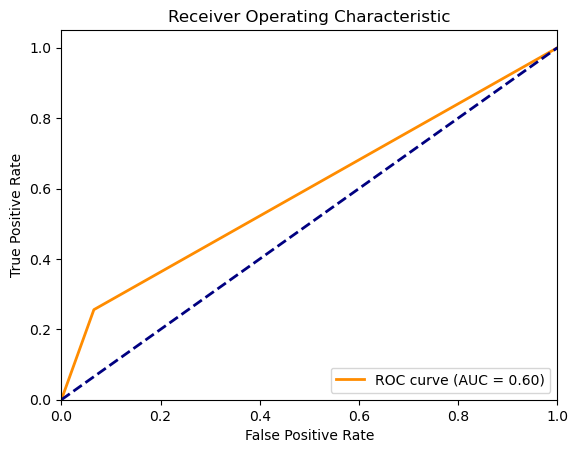

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_score contains the predicted probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test ,y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

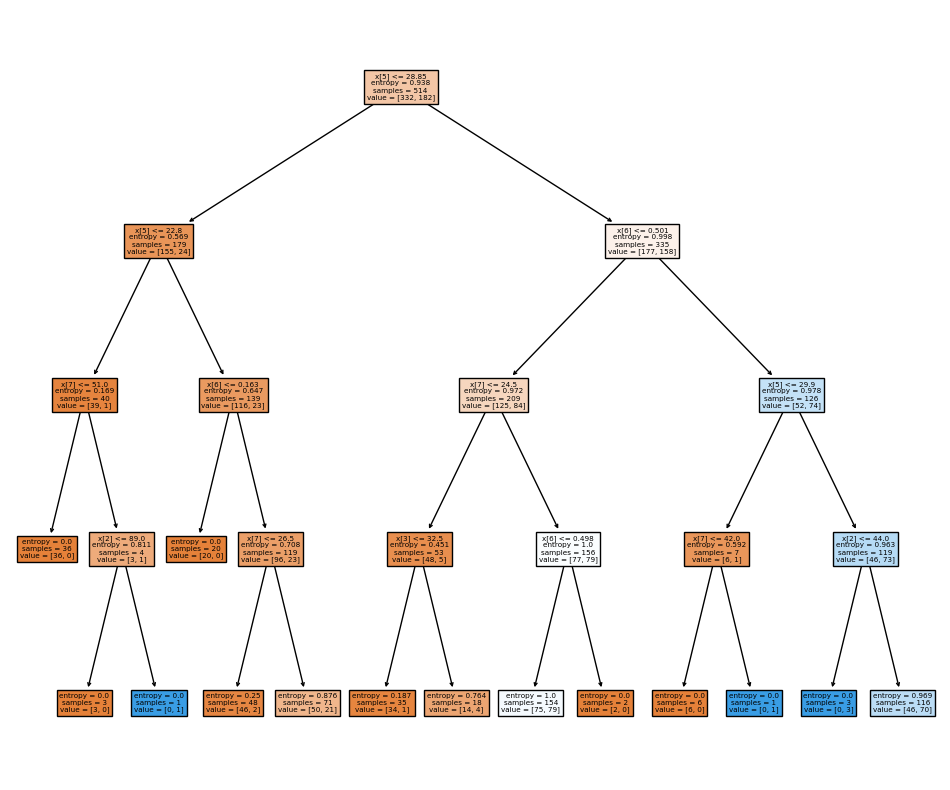

In [43]:
%matplotlib inline
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)
plt.show()

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [44]:
# Sensitivity analysis
'''changes in the dataset or the environment on the model's performance. 
For example, we can remove certain variables or add new variables to the dataset to see how it affects the model's accuracy.'''

a = [1,	85,	66,	29,	0,	26.6,	0.351,	31]
data = pd.array(a).reshape(1,-1)
data

<FloatingArray>
[
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0]
]
Shape: (1, 8), dtype: Float64

In [45]:
prediction = classifier.predict(data)
print(prediction)

if prediction == 0:
    print ('Non-Diabetic')
else:
    print ('Diabetic')

[0]
Non-Diabetic


In [46]:
# Scenario testing
'''
Explore the uncertainty and risks associated with the model's predictions.
For example, we can test the model's performance under different scenarios or assumptions, such as changes in market conditions, customer preferences, or regulatory policies. 
This can help us identify potential sources of error or bias in the model and develop strategies to mitigate them.
'''

X_scenario = X_test.copy()
X_scenario.iloc[:,3] = 0.8
y_scenario = classifier.predict(X_scenario)
print("Scenario accuracy:", accuracy_score(y_test, y_scenario))

Scenario accuracy: 0.562992125984252


In [50]:
import pickle
file = open('decision_tree_model.pkl','wb')
pickle.dump(classifier,file)
file.close()